## Read Data

In [1]:
import pandas as pd
df = pd.read_csv('/content/df_limit_100K.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               10000 non-null  object 
 1   Additional_Number_of_Scoring                10000 non-null  int64  
 2   Review_Date                                 10000 non-null  object 
 3   Average_Score                               10000 non-null  float64
 4   Hotel_Name                                  10000 non-null  object 
 5   Reviewer_Nationality                        10000 non-null  object 
 6   Negative_Review                             10000 non-null  object 
 7   Review_Total_Negative_Word_Counts           10000 non-null  float64
 8   Total_Number_of_Reviews                     10000 non-null  float64
 9   Positive_Review                             10000 non-null  object 
 10  Review_Tota

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.dropna(subset=['lat', 'lng'], inplace=True)


### Word Cloud - All words

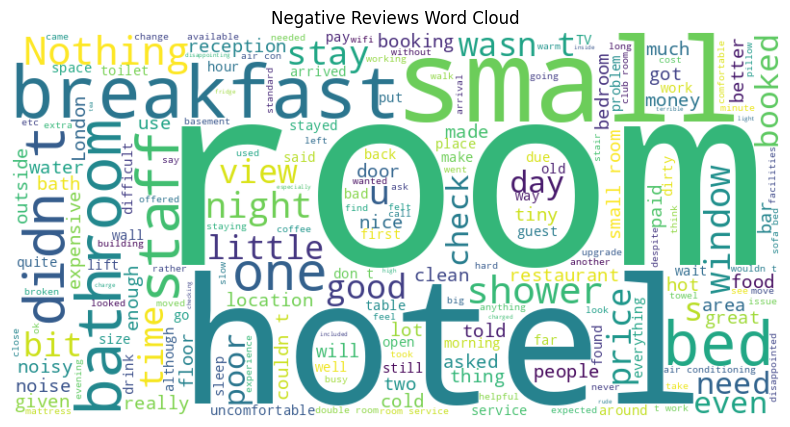

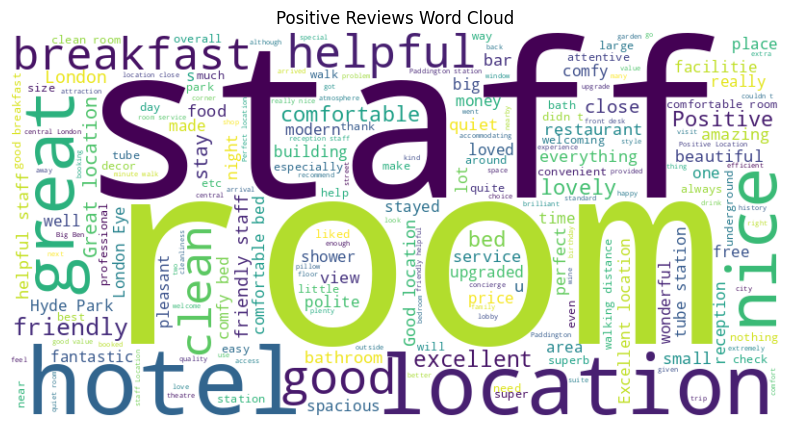

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aggregate all negative and positive review texts
negative_reviews_text = " ".join(review for review in df.Negative_Review)
positive_reviews_text = " ".join(review for review in df.Positive_Review)
negative_reviews_text_cleaned = negative_reviews_text.replace("Negative", "")

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate and display word clouds for negative and positive reviews
generate_word_cloud(negative_reviews_text_cleaned, 'Negative Reviews Word Cloud')
generate_word_cloud(positive_reviews_text, 'Positive Reviews Word Cloud')


## Word Cloud - Only Nouns

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def filter_nouns(text):
    """
    Tokenize the text, perform part-of-speech tagging, and filter out only nouns.
    """
    # Tokenize the text
    tokens = word_tokenize(text)
    # Part-of-speech tagging
    tagged_tokens = pos_tag(tokens)
    # Filter nouns (NN for singular nouns, NNS for plural nouns, NNP for proper singular nouns, NNPS for proper plural nouns)
    nouns = [word for word, tag in tagged_tokens if tag in ('NN', 'NNS', 'NNP', 'NNPS')]
    return ' '.join(nouns)

# Update the show_word_cloud_for_hotel function to use the filter_nouns function
def show_word_cloud_for_hotel(change):
    # Clear previous output
    clear_output(wait=True)
    display(dropdown_hotels)

    # Filter reviews for the selected hotel
    selected_hotel = change['new']
    positive_reviews = df[df['Hotel_Name'] == selected_hotel]['Positive_Review']
    negative_reviews = df[df['Hotel_Name'] == selected_hotel]['Negative_Review']

    # Aggregate review texts
    positive_text = " ".join(filter_nouns(review) for review in positive_reviews)
    negative_text = " ".join(filter_nouns(review) for review in negative_reviews).replace("negative", "")

    # Generate word clouds
    generate_word_cloud(positive_text, f'Positive Reviews for {selected_hotel}')
    generate_word_cloud(negative_text, f'Negative Reviews for {selected_hotel}')

# Bind the function to the dropdown so it updates on selection
dropdown_hotels.observe(show_word_cloud_for_hotel, names='value')

# Display the dropdown
display(dropdown_hotels)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NameError: name 'dropdown_hotels' is not defined